# "nbdev2 - first steps"
> "by Jeremy Howard and Hamel Hussain"
- show_tags: true
- toc: true
- branch: master
- badges: false
- comments: true
- categories: [nbdev, fastai, jupyter]
- image: images/icons/fastai.png

fastai has just released [nbdev2](https://nbdev.fast.ai/).

This is a complete rewrite with quarto. I like how they displayed features in that card

![](https://nbdev.fast.ai/images/card.png)

# Support

There is a [nbdev section](https://forums.fast.ai/c/nbdev/48) in fastai forum.

There is a channel #nbdev-help at fastai discord. Never posted there.

And [issues page](https://github.com/fastai/nbdev/issues) in github fastai/nbdev repo.

# Walkthrough

There is a 90 min video: [nbdev tutorial](https://www.youtube.com/watch?v=l7zS8Ld4_iA&ab_channel=JeremyHoward) -- zero to published project in 90 minutes

I follow here this tutorial.

Here are the big steps:

## create github project

- create a new project with github: [dataset_tools](https://github.com/castorfou/dataset_tools). Give a description it will be reused by nbdev

## integrate `nbdev` in your python environment

- create a local conda env `dataset_tools` with what is required to develop this library

In [12]:
!cat /home/guillaume/_conda_env/dataset_tools.txt

conda remove --name dataset_tools --all
conda create --name dataset_tools python=3.9
conda activate dataset_tools
conda install ipykernel
python -m ipykernel install --user --name=dataset_tools
pip install nbdev -U
pip install pandas


In [11]:
import sys
!{sys.prefix}/bin/pip list|grep nbdev

nbdev              2.2.10


## clone repo and turned it into a nbdev repo

- clone repo `dataset_tools` and turn it into a nbdev repo


```bash
git clone git@github.com:castorfou/dataset_tools.git
conda activate dataset_tools
cd dataset_tools
```

## nbdev_ commands are ready to be used

* nbdev can be used from here. For example `nbdev_help`  to display all nbdev_ commands and what it does. And more detail can be got with `-h`: `nbdev_new -h`

In [14]:
!{sys.prefix}/bin/nbdev_help

nbdev_bump_version              Increment version in settings.ini by one
nbdev_changelog                 Create a CHANGELOG.md file from closed and labeled GitHub issues
nbdev_clean                     Clean all notebooks in `fname` to avoid merge conflicts
nbdev_conda                     Create a `meta.yaml` file ready to be built into a package, and optionally build and upload it
nbdev_create_config             Create a config file.
nbdev_deploy                    Deploy docs to GitHub Pages
nbdev_docs                      Create Quarto docs and README.md
nbdev_export                    Export notebooks in `path` to Python modules
nbdev_filter                    A notebook filter for Quarto
nbdev_fix                       Create working notebook from conflicted notebook `nbname`
nbdev_help                      Show help for all console scripts
nbdev_install                   Install Quarto and the current library
nbdev_install_hooks             Install Jupyter and git hooks to automa

* `nbdev_new`. It is creating the structure and files such as settings.ini.
* from base environment we can start `jupyter notebook`. It is advised to install nb_extensions (`pip install jupyter_contrib_nbextensions`), and activate TOC2. Open `00_core.ipynb` with `dataset_tools` kernel. Rename `00_core.ipynb` --> `00_container.ipynb`

## and `#| ` prefix in notebooks as well

Jeremy explains then what are `#|` used by quarto and nbdev.

And for example `#| hide` will allow to be executed but hide in your documentation.

Actually from a single notebook, you have 3 usages:
* the notebook by itself -  all cells are executed, whatever are the prefix `#|` that you display on cells
* the python file -  only the cells with `#| export` will be published in a python file referenced as `#| default_exp <name of python file>`. A new file is genreated when `nbdev_export` is called.
* the documentation - all cells are used, except the one started with `#| hide`. Seems to be dynamically generated (when `nbdev_preview` is running?). `#| export` are handled specifically: if you have import, nothing is displayed. If you have code, definitions and docstrings are exported, and arguments as well.

There is an easy way to describe arguments of a function.

Just make some indentation with comments such as in

```python
    def __init__(self, 
                 cle : str, # la clé du container
                 dataset : pd.DataFrame = None, # le dataset
                 colonnes_a_masquer : list = [], # les colonnes à masquer
                 colonnes_a_conserver : list = [] # les colonnes qui ne seront pas transformées
                ):
```

### show_doc

and we can directly see the effect of it by calling `show_doc` (`show_doc(Container)`). You can even call show_doc on code not written with nbdev, or not even written by you.

In [17]:
from nbdev.showdoc import *
import pandas as pd
show_doc(pd.DataFrame)

/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/fastcore/docscrape.py:225: UserWarning: Unknown section See Also
  else: warn(msg)
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/fastcore/docscrape.py:225: UserWarning: Unknown section Examples
  else: warn(msg)


---

### DataFrame

>      DataFrame (data=None, index:Axes|None=None, columns:Axes|None=None,
>                 dtype:Dtype|None=None, copy:bool|None=None)

Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| data | NoneType | None | Dict can contain Series, arrays, constants, dataclass or list-like objects. If<br>data is a dict, column order follows insertion-order. If a dict contains Series<br>which have an index defined, it is aligned by its index.<br><br>.. versionchanged:: 0.25.0<br>   If data is a list of dicts, column order follows insertion-order. |
| index | Axes \| None | None | Index to use for resulting frame. Will default to RangeIndex if<br>no indexing information part of input data and no index provided. |
| columns | Axes \| None | None | Column labels to use for resulting frame when data does not have them,<br>defaulting to RangeIndex(0, 1, 2, ..., n). If data contains column labels,<br>will perform column selection instead. |
| dtype | Dtype \| None | None | Data type to force. Only a single dtype is allowed. If None, infer. |
| copy | bool \| None | None | Copy data from inputs.<br>For dict data, the default of None behaves like ``copy=True``.  For DataFrame<br>or 2d ndarray input, the default of None behaves like ``copy=False``.<br><br>.. versionchanged:: 1.3.0 |

### unit testing

There are some basic testing functionalty available by importing fastcore. `from fastcore.test import *`

With `test_eq` very closed to `assert` and `test_ne` closed to `assert not`

In [20]:
from fastcore.test import *
show_doc(test_eq)
show_doc(test_ne)

---

[source](https://github.com/fastai/fastcore/blob/master/fastcore/test.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### test_ne

>      test_ne (a, b)

`test` that `a!=b`

This is convenient to integrate all the unit tests that way. When you will export by running `Restart & Run All`, if an error is met, export won't be done.

And one can run `nbdev_test` from the command line.

### @patch - define method out of its class

Just by adding this import

```python
from fastcore.utils import *
```

one can use
```python
@patch
def new_method(self:myclass):
    pass
```


### `nbdev_export`

from command line, one can run `nbdev_export`

or directly from jupyter, for example will be executing `Restart & Run All`

```python
#| hide
import nbdev; nbdev.nbdev_export()
```



And we can install it to be used directly by running `pip install -e .`

It means that you can now import your project with

`from dataset_tools.container import *`

When it will be published (pypi or conda), it will be installable by calling

`pip install dataset-tools`

or

`conda install -c fastai dataset-tools`

NB: see how `_` has been turned into `-`, and for that to happen we have to update `lib_name` and `lib_path` in `settings.ini` by replacing `_`with `-`

NB2: it is still confusing for me. It looks like modifying `lib_path` is not a good optiom.

### index.ipynb

Here it is a good idea to give overview about how to use it.

By importing your library and start using it.

And it will be exported as the homepage of your lib.

Just have to decide what should land in index and what should land in module page.

### `nbdev_preview`

Just run it from command line

```bash
nbdev_preview
```

and it is accessible from http://localhost:3000.

This is a quarto webserver. The 1st time you launch it it will install quarto for you. On ubuntu this is a standard package so it will be updated regularly.


In [22]:
from getpass import getpass
!echo {getpass()} | sudo -S apt-cache show quarto

········
[sudo] password for guillaume: Package: quarto
Status: install ok installed
Priority: optional
Section: user/text
Installed-Size: 242759
Maintainer: RStudio, PBC <quarto@rstudio.org>
Architecture: amd64
Version: 1.1.189
Description: Quarto is an academic, scientific, and technical publishing system built on Pandoc.
Description-md5: 516c872f9c3577457bbd01eac38f8130
Homepage: https://github.com/quarto-dev/quarto-cli



### `nbdev_test`

As mentionned earlier, one can run `nbdev_test` to execute all tests in all notebooks.

If it fails, Hamel has shared his dev workflow. He runs `Restart kernel & run All`, and use `%debug` magic command to enter debug mode.

You then have access to all `ipdb` commands such as h for help, p `var` to print content of `var`, w for stacktraces

In [24]:
%debug

> /tmp/ipykernel_2453/349085080.py(1)<cell line: 1>()
----> 1 show_doc(test_eq)

ipdb> h

Documented commands (type help <topic>):
EOF    commands   enable    ll        pp       s                until 
a      condition  exit      longlist  psource  skip_hidden      up    
alias  cont       h         n         q        skip_predicates  w     
args   context    help      next      quit     source           whatis
b      continue   ignore    p         r        step             where 
break  d          interact  pdef      restart  tbreak         
bt     debug      j         pdoc      return   u              
c      disable    jump      pfile     retval   unalias        
cl     display    l         pinfo     run      undisplay      
clear  down       list      pinfo2    rv       unt            

Miscellaneous help topics:
exec  pdb

ipdb> q


### Golden rule: don't mix imports and code

For a reason it is asked not to mix cells with imports and code.

I am not sure what is the core reason for that. Something due to show_doc or doc generation?

During my tests, I have seen something complaining about it after running `nbdev_export` or `nbdev_test` but cannot reproduce that. Hmmm


### `nbdev_clean`

Just to remove unnecessary metadata in ipynb files.

Will open an issue, because it fails to run here

```bash
(dataset_tools) guillaume@LK06LPF2LTSSL:~/git/dataset_tools$ nbdev_clean
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:110: UserWarning: Failed to clean notebook
  warn(f'{warn_msg}')
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:111: UserWarning: clean_ids
  warn(e)
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:111: UserWarning: clean_ids
  warn(e)
```

### push to github

Not a bad thing to run all these stuff

```bash
nbdev_clean
git diff
git status
git add -A
nbdev_export
nbdev_test
nbdev_docs
git commit -am'init version'
git push

```

Note that for a reason nbdev_clean is failing
```bash
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:110: UserWarning: Failed to clean notebook
  warn(f'{warn_msg}')
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:111: UserWarning: clean_ids
  warn(e)
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:111: UserWarning: clean_ids
  warn(e)
```

And Hamel suggests to add `clean_ids = True` in settings.ini



`nbdev_docs`is pushing the content of index.ipynb to README.md

### define dep

Just modify `settings.ini`to add dependancies (here pandas)

```bash
# end of settings.ini
[..]
### Optional ###
requirements = fastcore pandas
# dev_requirements =
# console_scripts =
clean_ids = True
```

Et voila!, doc is available at https://castorfou.github.io/dataset_tools/ and you can push that address to your repo settings

### publish to Pypi, conda, ...

This is done by calling `nbdev_pypi`or `nbdev_conda`.
And it is modifying settings.ini to increment version number. (very much as `nbdev_bump_version` does)

There are other commands such as `nbdev_release_xxx` the seems to do quite the same for git.

# Gitlab integration


because this is the platform we use at Michelin, I will need to make it work with our internal gitlab instance.

There is on-going work to make it happen:

* from Hamel Husain - enhancement request [Support gitlab](https://github.com/fastai/nbdev/issues/945)
* and from fastai community in forum: [Nbdev and Gitlab (source links)](https://forums.fast.ai/t/nbdev-and-gitlab-source-links/98867), [Example: nbdev on Gitlab](https://forums.fast.ai/t/example-nbdev-on-gitlab/98890)

## my tests with our internal gitlab

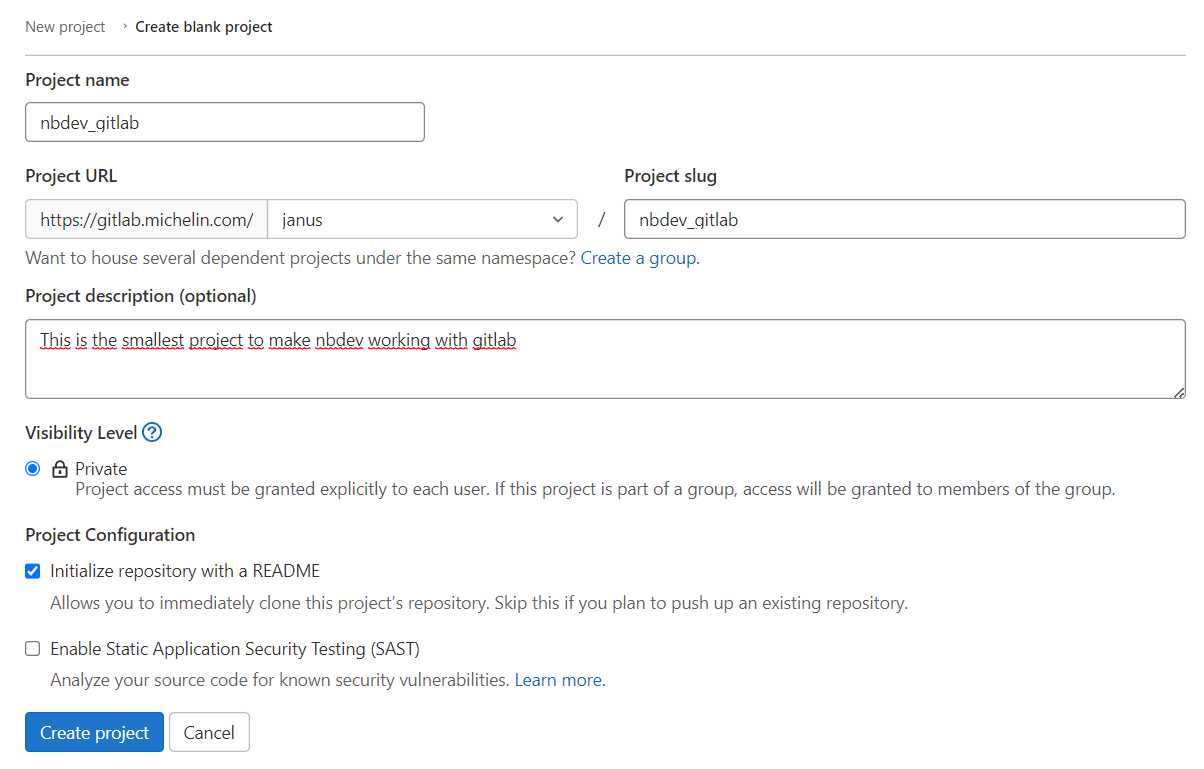